<a href="https://colab.research.google.com/github/sergioc248/apuntes-inteligencia-artificial/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akshaydattatraykhare/diabetes-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/akshaydattatraykhare/diabetes-dataset/versions/1


In [12]:
df = pd.read_csv(path + "/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.shape

(768, 9)



> Hay 8 features (columnas para entrenar) y una label (columna supervisada que se busca predecir)



In [14]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0



##<font color="red">Vamos a dividir los datos: </font> Para utilizar una parte para el entrenamiento del modelo y otra parte para testear el modelo (que no esté sobreentrenado en los datos de traineo, etc). Se utiliza 80% para train y 20% para test.


### Usamos **Stratify** para que los datos se dividan con proporciones iguales. Es decir, para que no me queden todos los datos de testeo (ni traneo= con Outcome: 0, sino tengan la misma proporción a los datos originales.

In [17]:
# Separar features y labels
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [18]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

<Axes: xlabel='Outcome', ylabel='count'>

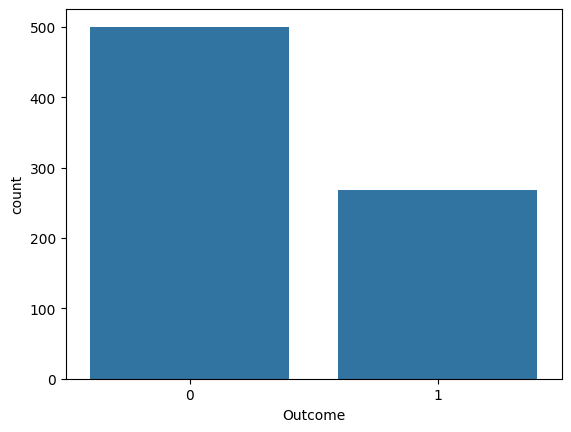

In [27]:
# Gráfico de barras para vel el balance de la columna Outcome
sns.countplot(x="Outcome", data=df)

In [29]:
cantidad=df.Outcome.value_counts()
cantidad/cantidad.sum()

,count
Outcome,
0,0.651042
1,0.348958


In [31]:
cantidad_diabetes=len(y_train[y_train==1])
cantidad_no_diabetes=len(y_train[y_train==0])
print("Cantidad de diabetes:", cantidad_diabetes)
print("Cantidad de no diabetes:", cantidad_no_diabetes)
print("Porcentaje de diabetes:", cantidad_diabetes/len(y_train))
print("Porcentaje de no diabetes:", cantidad_no_diabetes/len(y_train))

Cantidad de diabetes: 214
Cantidad de no diabetes: 400
Porcentaje de diabetes: 0.3485342019543974
Porcentaje de no diabetes: 0.6514657980456026




> Si la diferencia entre las clases es mayor al 30%, debo balancear el dataset con datos sintéticos. (En este ejemplo no haría falta pero lo haremos para fines de entrenamiento)

